In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/kaggle/input/salaly-prediction-for-beginer/Salary Data.csv")

In [2]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [4]:
df = df.dropna()
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

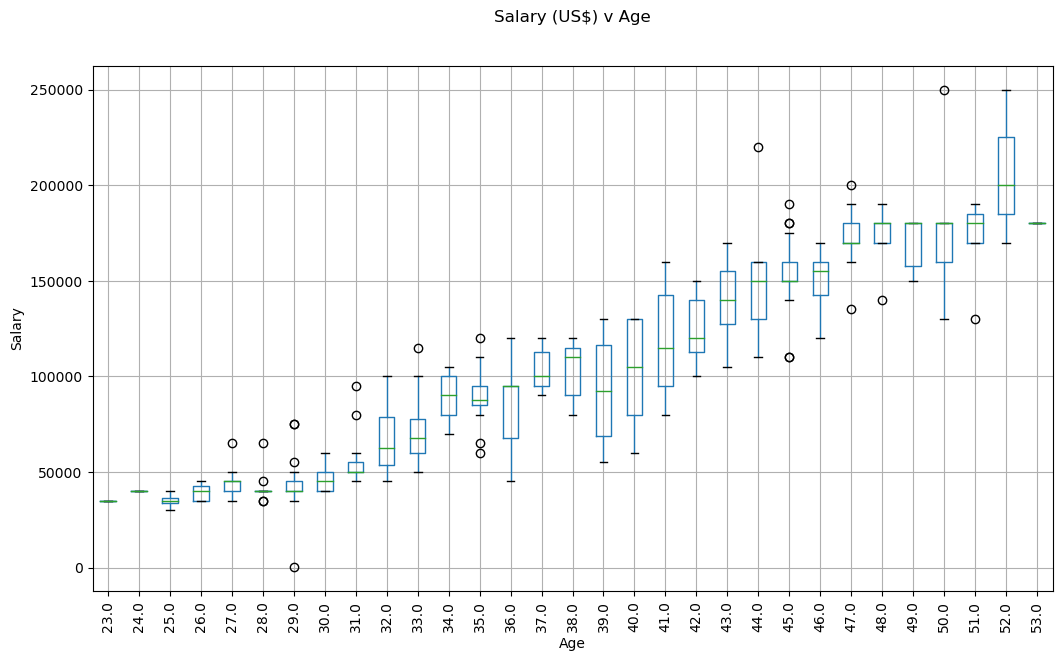

In [5]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Age', ax=ax)
plt.suptitle('Salary (US$) v Age')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

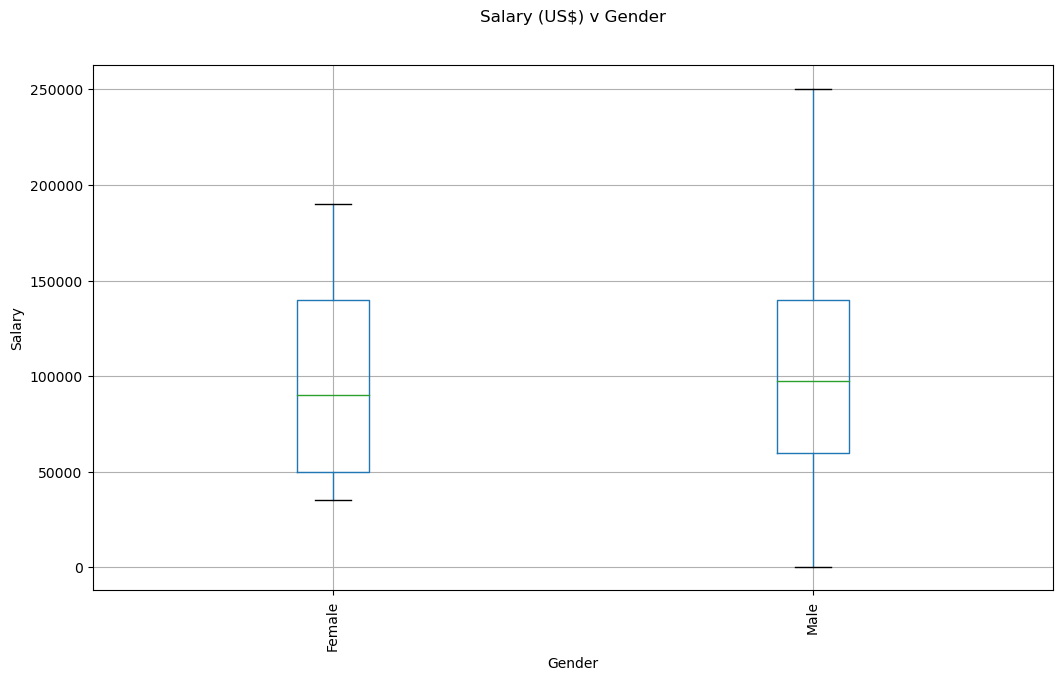

In [6]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Gender', ax=ax)
plt.suptitle('Salary (US$) v Gender')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

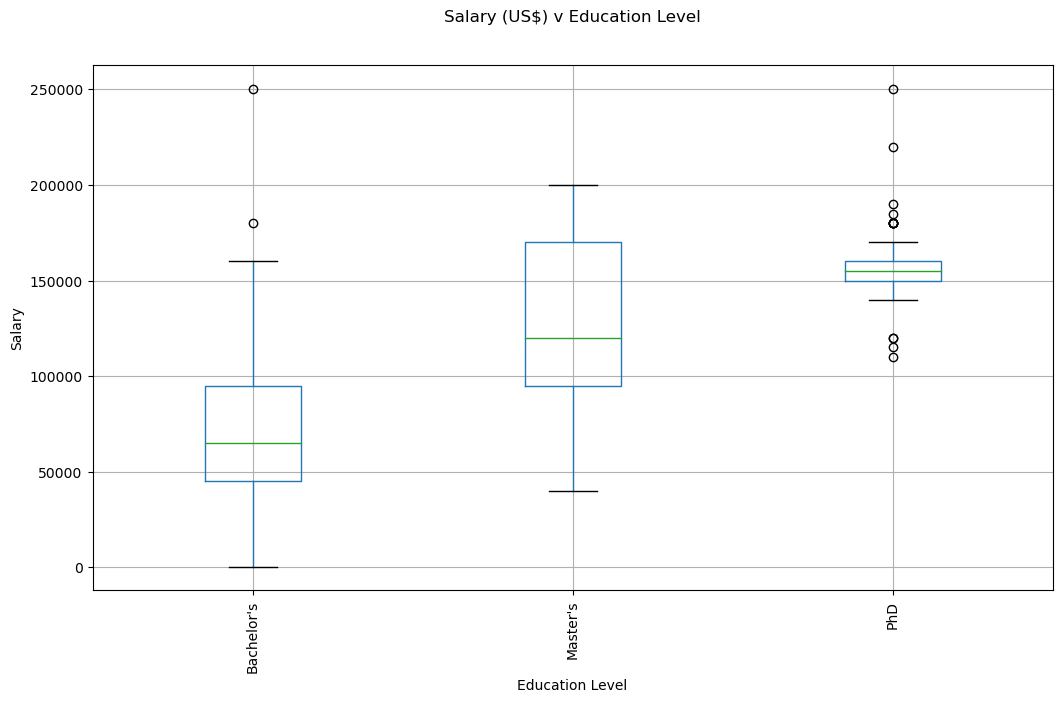

In [7]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Education Level', ax=ax)
plt.suptitle('Salary (US$) v Education Level')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

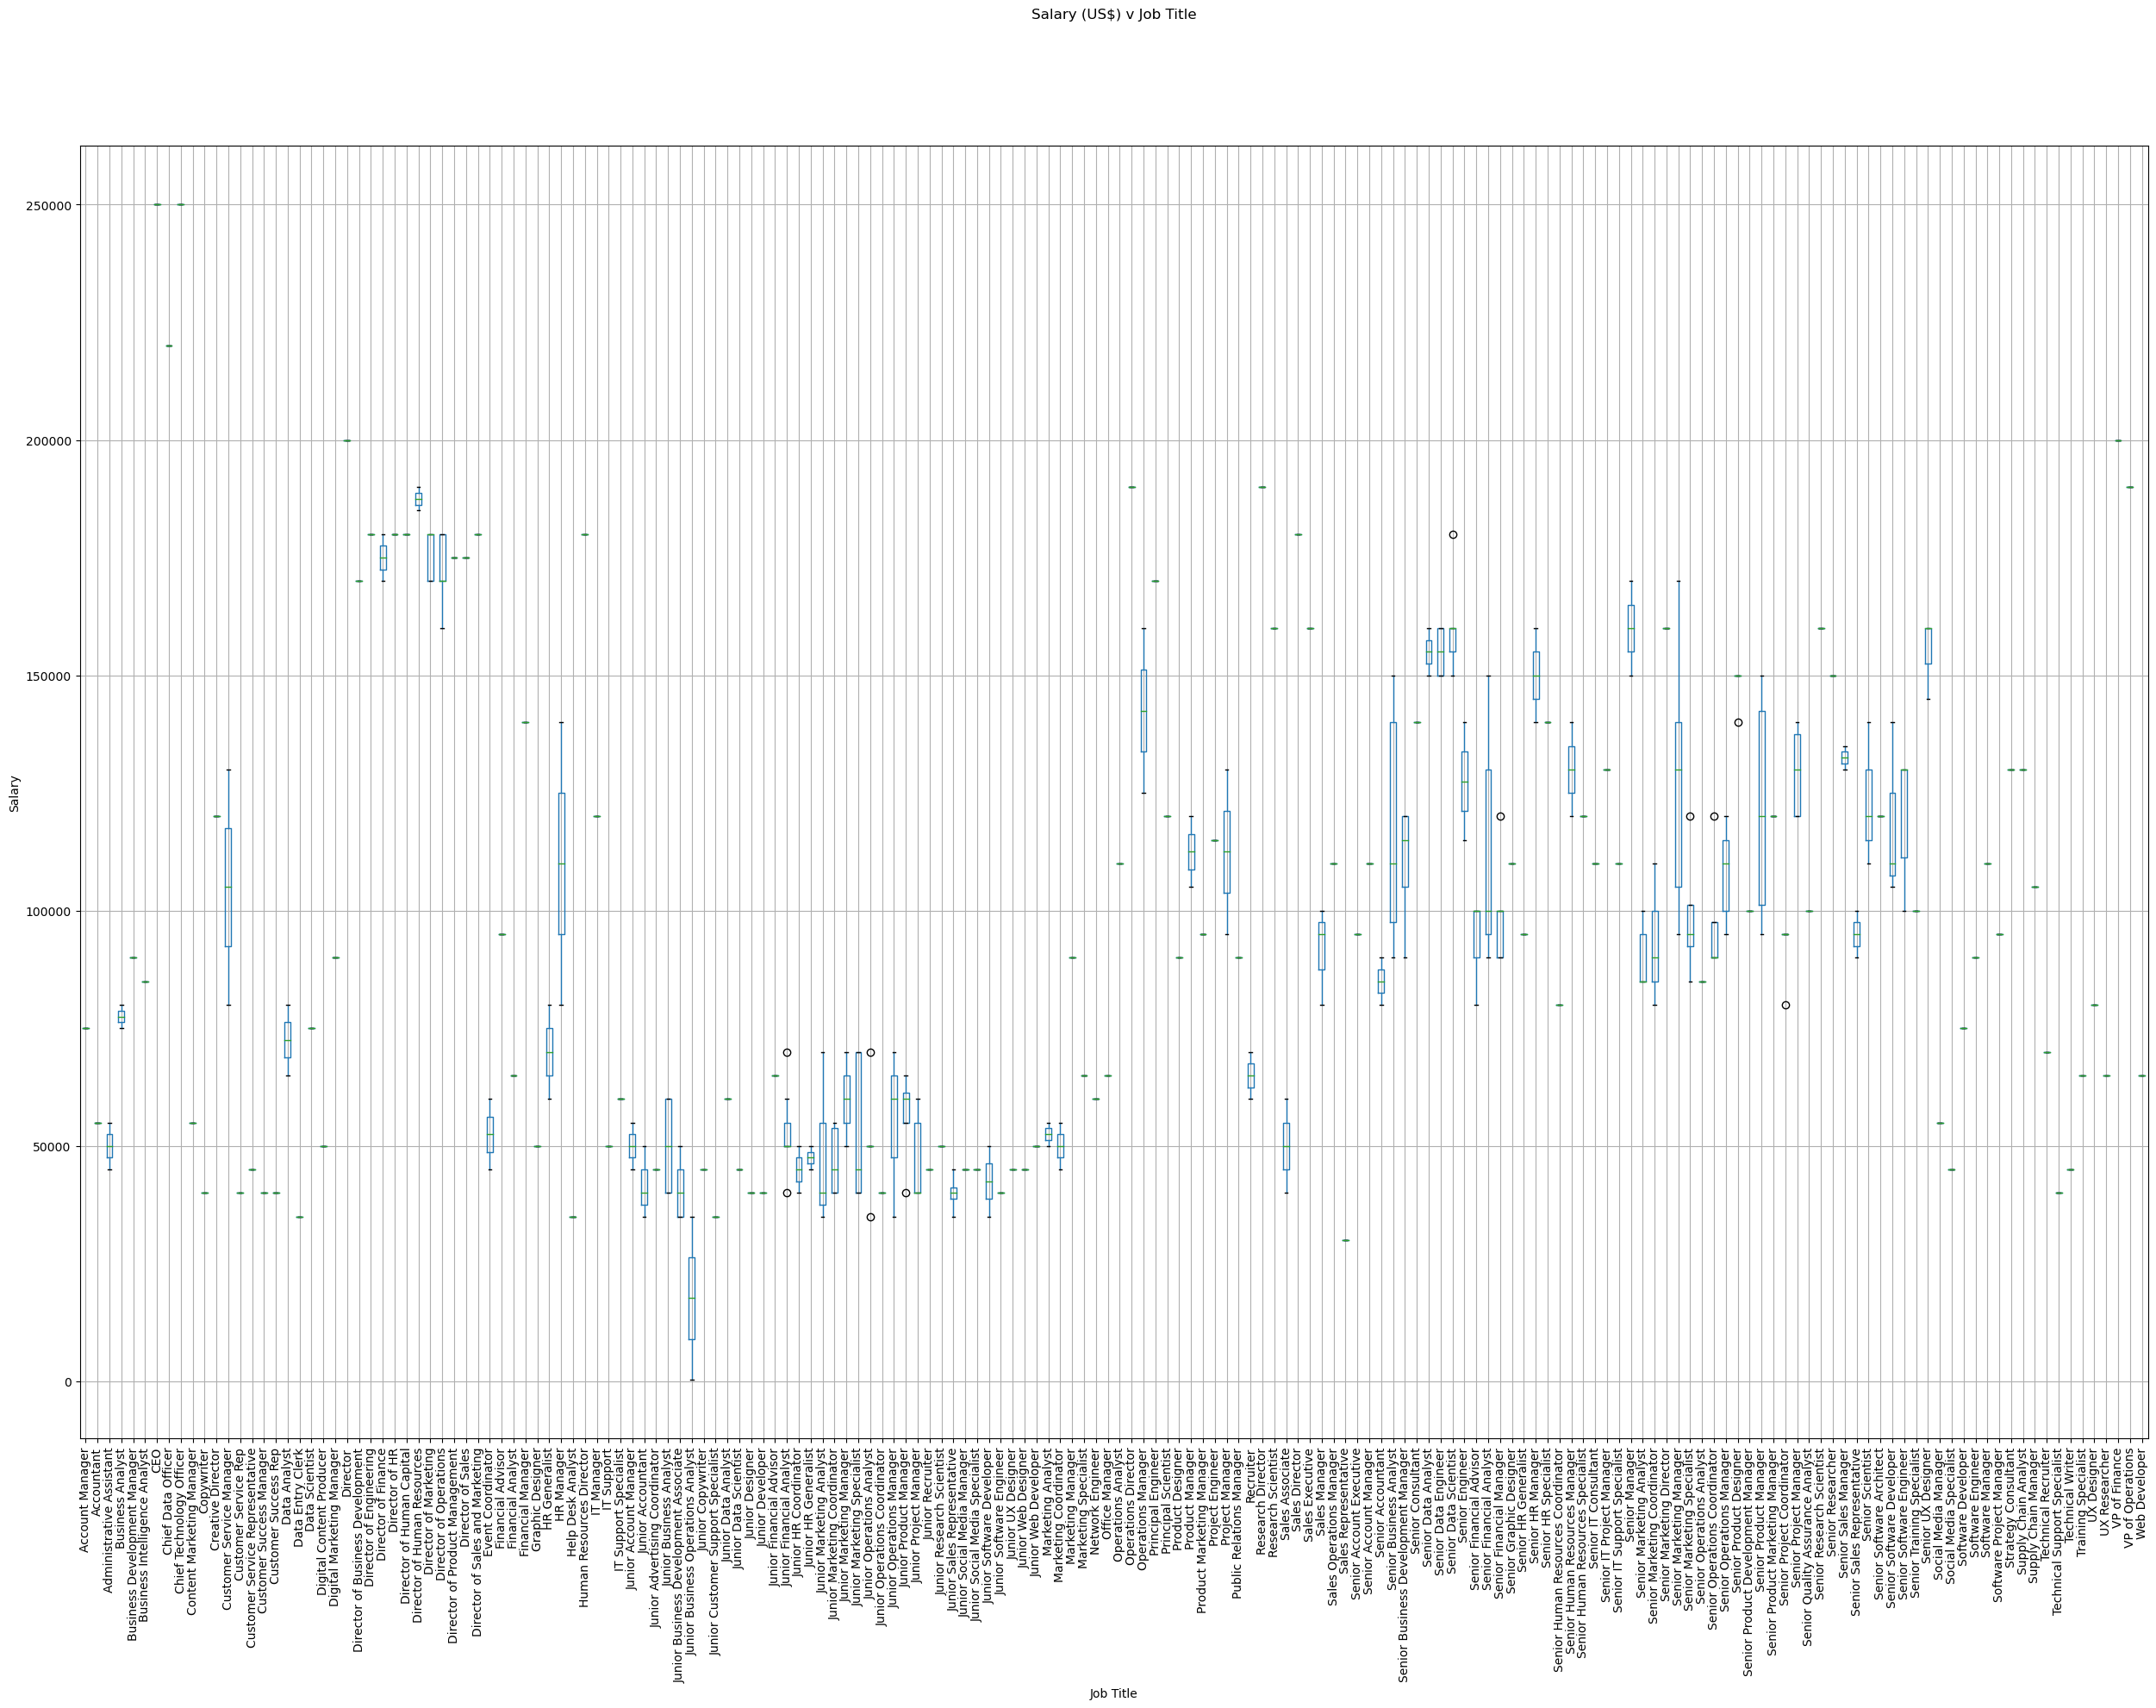

In [8]:
fig, ax = plt.subplots(1,1, figsize=(30, 20))
df.boxplot('Salary', 'Job Title', ax=ax)
plt.suptitle('Salary (US$) v Job Title')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

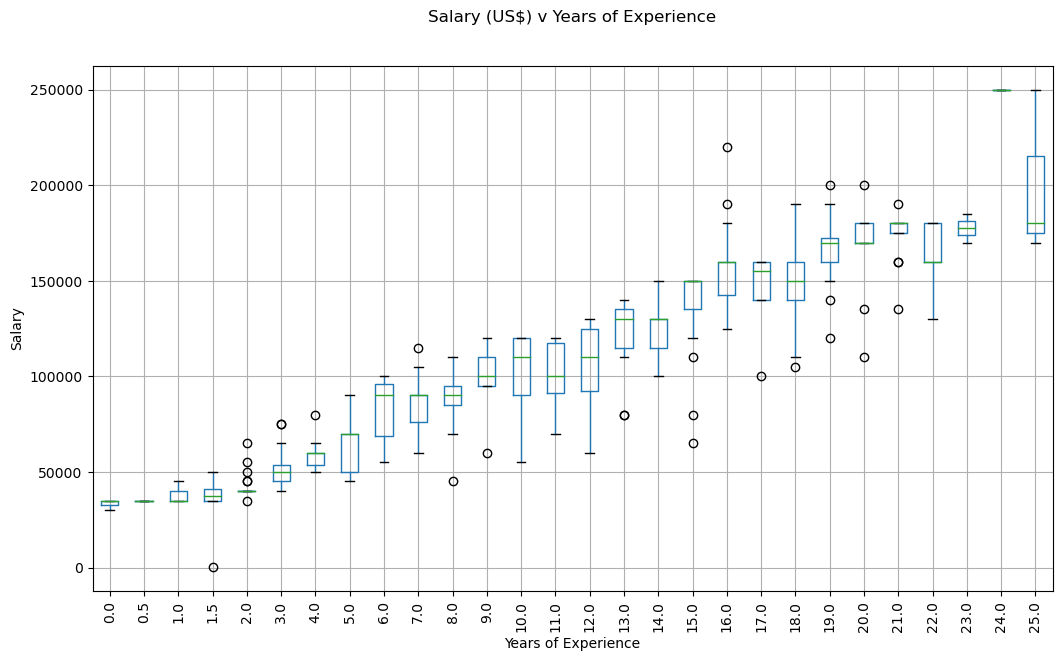

In [9]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Years of Experience', ax=ax)
plt.suptitle('Salary (US$) v Years of Experience')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [10]:
df["Years of Experience"].unique()

array([ 5. ,  3. , 15. ,  7. , 20. ,  2. , 12. ,  4. ,  1. , 10. , 18. ,
        6. , 14. , 16. ,  0. , 22. , 19. ,  9. , 13. , 11. , 25. , 21. ,
        8. , 17. , 23. , 24. ,  0.5,  1.5])

In [11]:
df["Education Level"].unique()

array(["Bachelor's", "Master's", 'PhD'], dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['Education Level'] = le_education.fit_transform(df['Education Level'])
df["Education Level"].unique()

array([0, 1, 2])

In [13]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['Gender'] = le_education.fit_transform(df['Gender'])
df["Gender"].unique()

array([1, 0])

In [14]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['Job Title'] = le_education.fit_transform(df['Job Title'])
df["Job Title"].unique()

array([159,  17, 130, 101,  22,  81,  93, 104,  82, 150, 158,  40,  36,
        96,  13,  89,  83, 116,  18, 102,   3, 172,  44,  98,  37, 157,
       160,  57, 112,  92,   6,   1,  19,  84, 167,  39,  95,  16, 103,
       169,  88,  85,   2, 162,  10,   0,  29,  41,  12,   5,  34, 171,
        38, 170, 156,  30, 115,  47,  21,  43,  14,   4, 118, 173,  99,
       166,  11, 153,  42,   9, 165, 106,   8,  56,  35,  46, 144,  91,
       164, 134, 168, 100,  76,  97,  87,  94, 122,  80, 143,   7,  20,
        45, 131,  15, 120, 161, 163, 110,  62,  86,  90,  61, 141,  66,
       121, 105, 152,  79, 154, 146,  73,  64,  54, 142,  49, 148,  65,
        70, 109,  32,  71, 111, 139,  53, 129,  59, 138,  28,  77, 149,
        31,  52, 132, 125,  50, 108, 147,  60,  25,  63,  55, 136, 124,
       155,  69, 135, 128, 145,  33, 107,  23,  74, 126, 113,  27,  48,
        78, 133, 127, 117,  51,  75, 140,  68, 151,  72, 119, 123, 114,
        67,  26, 137,  58,  24])

In [15]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

In [16]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [17]:
y_pred = linear_reg.predict(X)

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))

In [19]:
error

15153.411492156869

In [20]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [21]:
y_pred = dec_tree_reg.predict(X)

In [22]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("{:,.02f}".format(error))

1,691.31


In [23]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [24]:
y_pred = random_forest_reg.predict(X)

In [25]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("{:,.02f}".format(error))

5,107.23


In [26]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [27]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("{:,.02f}".format(error))

12,276.25
